# Twitch Stream Analysis

## overview

This analysis provides an in-depth examination of Twitch streaming data from 2016 to 2023, focusing on key metrics such as hours watched, hours streamed, game rankings, peak viewers, peak channels, average viewers, and average channels. Twitch, as one of the leading platforms for live streaming, particularly in gaming, has experienced significant growth and shifts in viewership patterns over the years. Understanding these metrics helps to capture the evolution of both the platform and the gaming community at large.

In [1]:
#import libraries

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker



In [2]:
#import csvs
game_data_df = pd.read_csv('./Twitch_game_data.csv',header=0,encoding='windows-1252')
global_data_df = pd.read_csv('./Twitch_global_data.csv',header=0,encoding='windows-1252') 

In [3]:
game_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18600 entries, 0 to 18599
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rank              18600 non-null  int64  
 1   Game              18599 non-null  object 
 2   Month             18600 non-null  int64  
 3   Year              18600 non-null  int64  
 4   Hours_watched     18600 non-null  int64  
 5   Hours_streamed    18600 non-null  int64  
 6   Peak_viewers      18600 non-null  int64  
 7   Peak_channels     18600 non-null  int64  
 8   Streamers         18600 non-null  int64  
 9   Avg_viewers       18600 non-null  int64  
 10  Avg_channels      18600 non-null  int64  
 11  Avg_viewer_ratio  18600 non-null  float64
dtypes: float64(1), int64(10), object(1)
memory usage: 1.7+ MB


In [4]:
game_data_df.head()

,Rank,Game,Month,Year,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
0,1,League of Legends,1,2016,94377226,1362044,530270,2903,129172,127021,1833,69.29
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105,372654,2197,120849,64378,1117,57.62
2,3,Dota 2,1,2016,45185893,433397,315083,1100,44074,60815,583,104.26
3,4,Hearthstone,1,2016,39936159,235903,131357,517,36170,53749,317,169.29
4,5,Call of Duty: Black Ops III,1,2016,16153057,1151578,71639,3620,214054,21740,1549,14.03


In [5]:
game_data_df['Hours_watched'] = game_data_df['Hours_watched'].map(lambda x: int(x))

In [6]:
print(game_data_df['Hours_watched'].max())
print(game_data_df['Hours_watched'].min())

344551979
89811


In [7]:
#create a df that aggregates the of hours watched and hours streamed
twitch_years = game_data_df.groupby('Year')
streamed_watched_hours = twitch_years.agg({"Hours_watched":"sum","Hours_streamed":"sum"})
streamed_watched_hours = streamed_watched_hours.reset_index()


In [8]:
streamed_watched_hours

,Year,Hours_watched,Hours_streamed
0,2016,5082766384,134438174
1,2017,6044740005,165167993
2,2018,8588082625,285239100
3,2019,10029602019,342095241
4,2020,16976473071,610412169
5,2021,22145586100,725171459
6,2022,20397399743,612074847
7,2023,14352774355,468947106


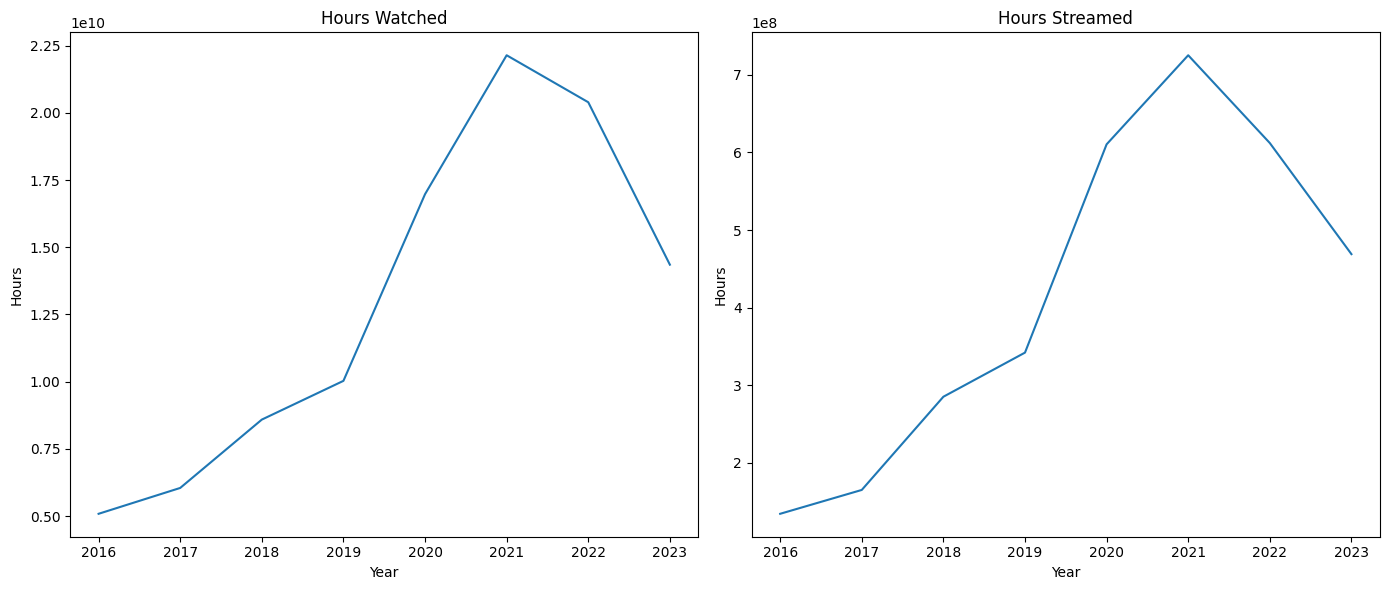

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
# Plot 1: Hours_watched
sns.lineplot(data=streamed_watched_hours, x='Year', y='Hours_watched', ax=axs[0])
axs[0].set_title('Hours Watched')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Hours')

# Plot 2: Hours_streamed
sns.lineplot(data=streamed_watched_hours, x='Year', y='Hours_streamed', ax=axs[1])
axs[1].set_title('Hours Streamed')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Hours')

# Adjust layout
plt.tight_layout()
plt.show()

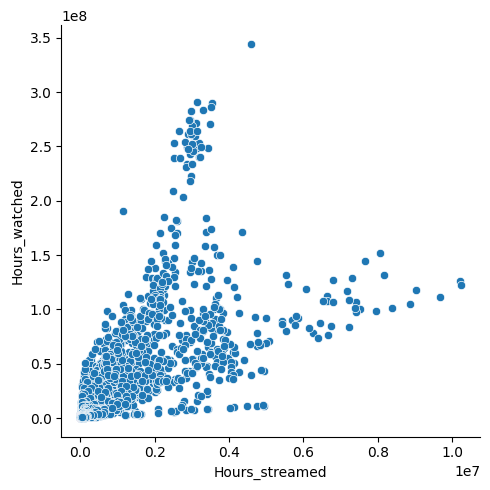

In [10]:
sns.relplot(data=game_data_df,x='Hours_streamed',y='Hours_watched')

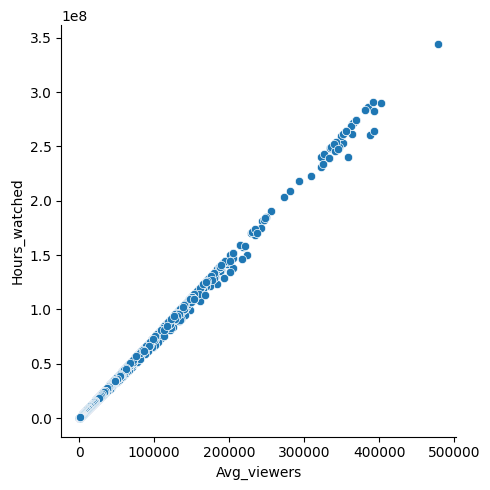

In [11]:
sns.relplot(data=game_data_df,x='Avg_viewers',y='Hours_watched')

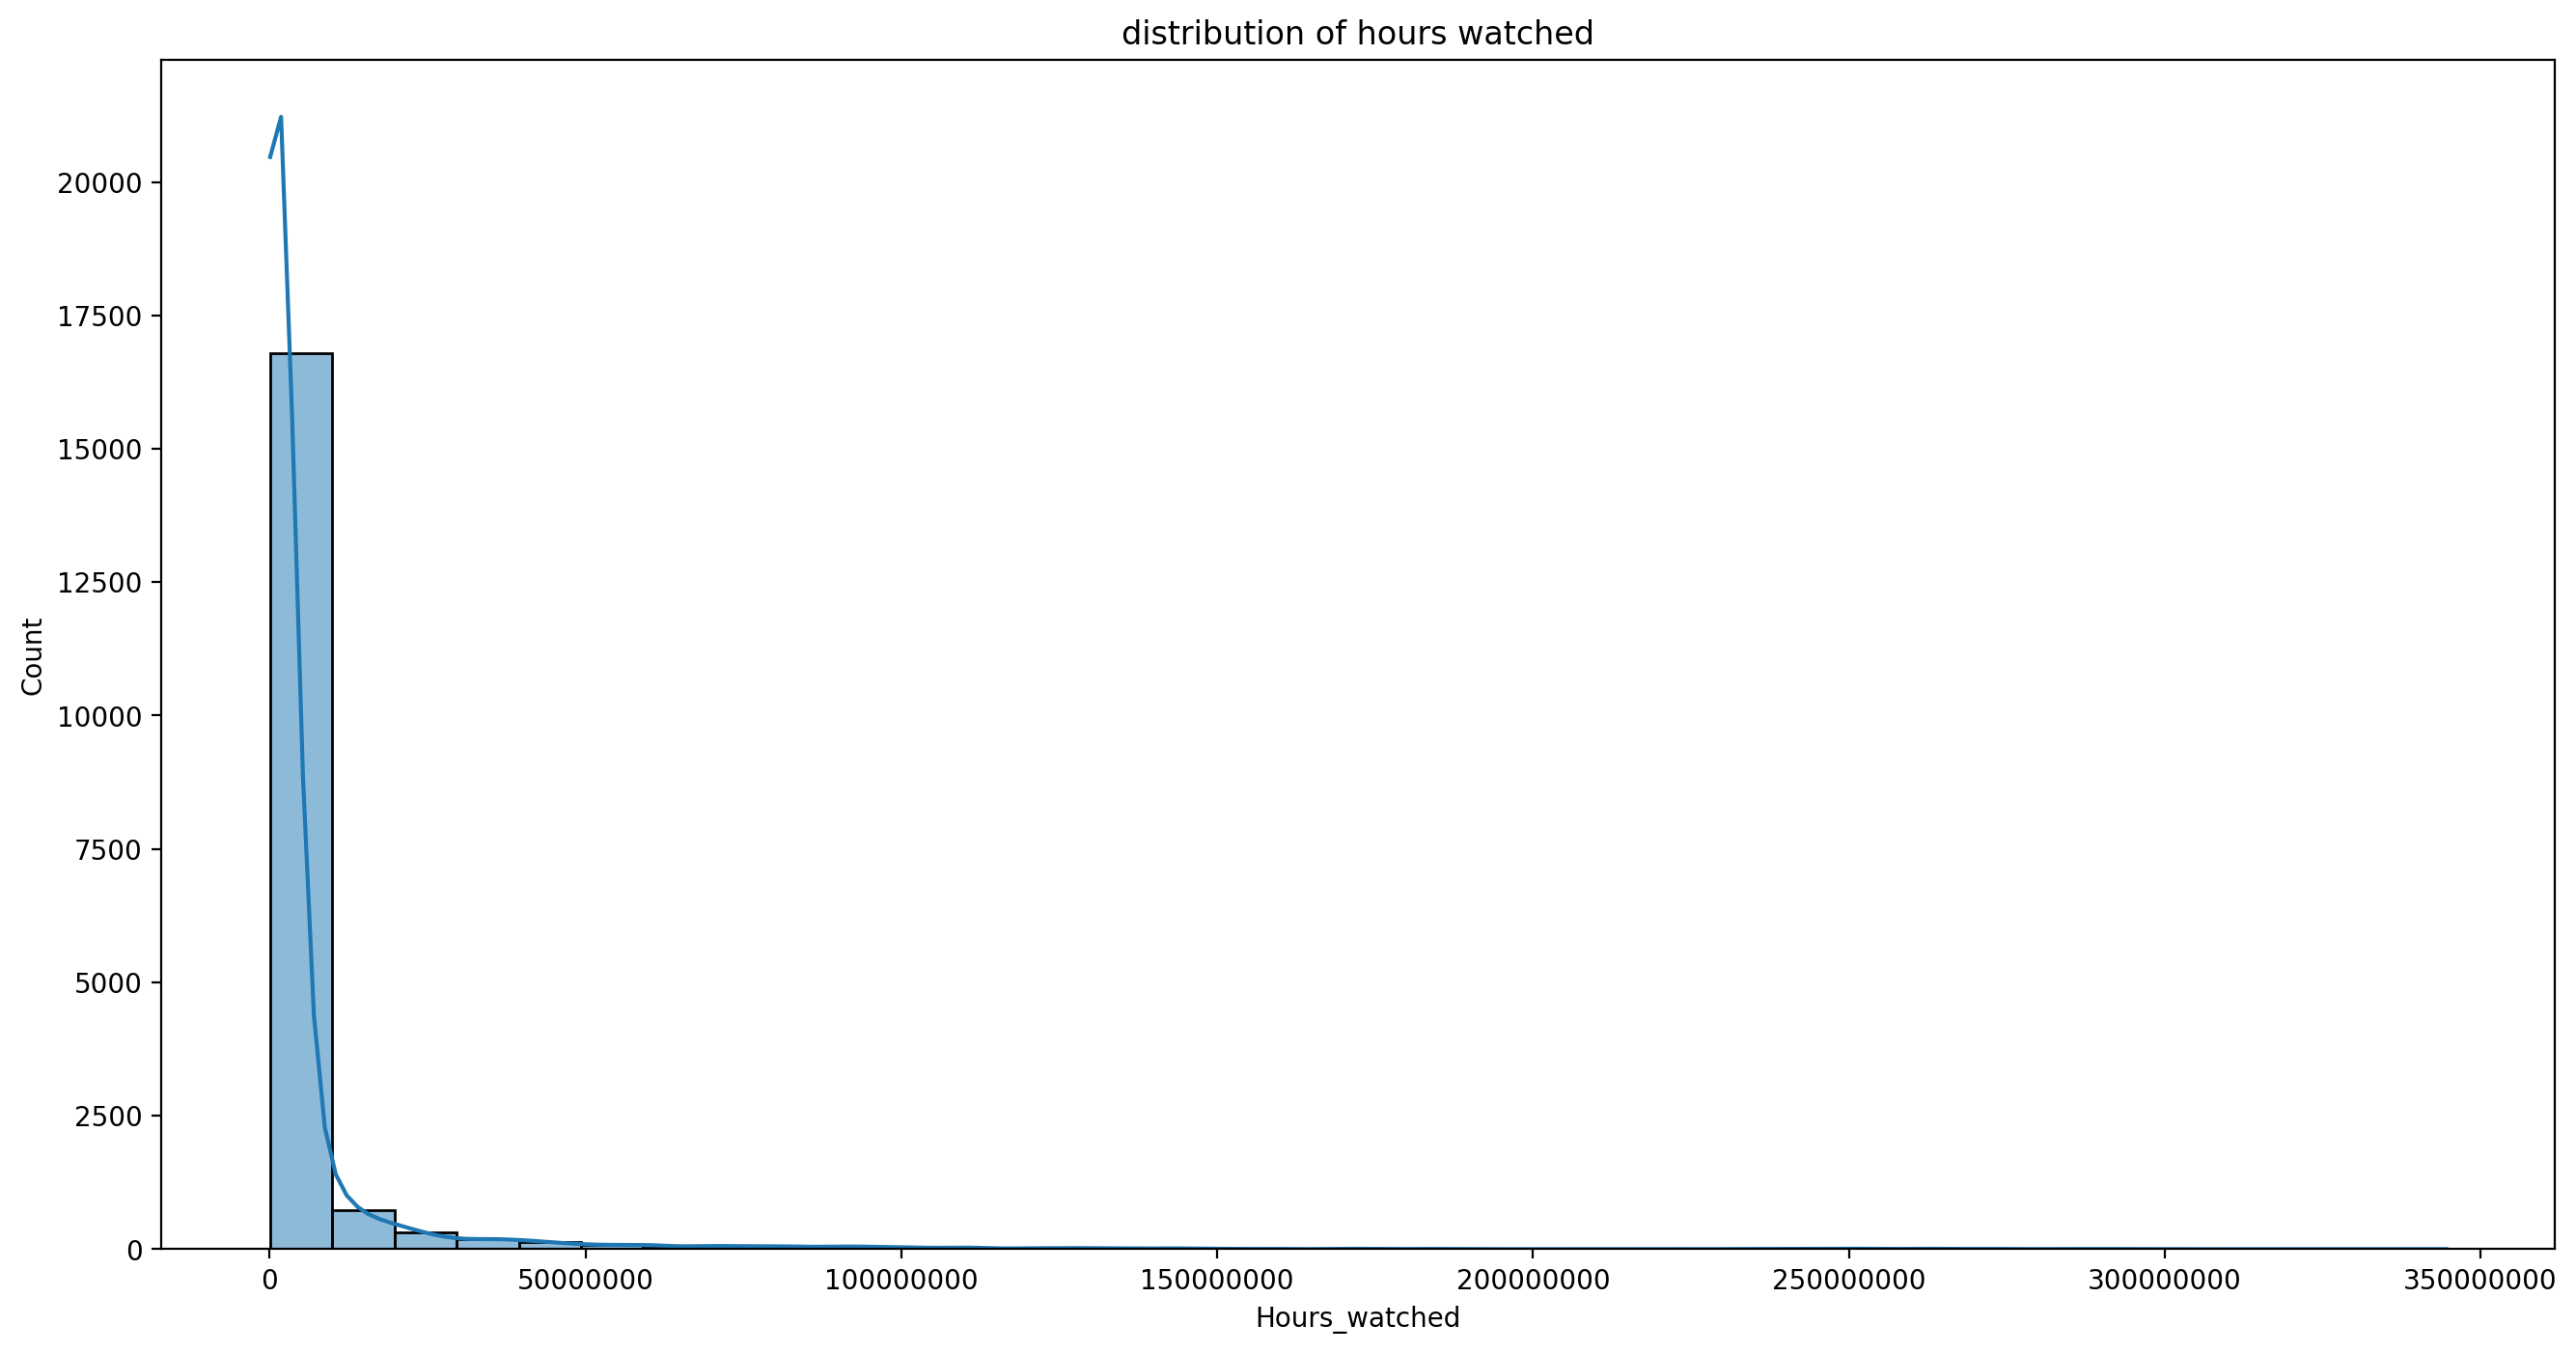

In [12]:

plt.figure(figsize=(16,8),dpi=200)
plt.ticklabel_format(style='plain')
sns.histplot(data=game_data_df,x='Hours_watched',bins=35,kde=True)
plt.title("distribution of hours watched")
plt.show()

In [13]:
lol_game = game_data_df[game_data_df['Game']=='League of Legends']
peak_views = lol_game.groupby(['Year']).agg({"Peak_viewers":"sum"})
lol_avg_views = lol_game.groupby(['Year']).agg({'Avg_viewers':'sum'})

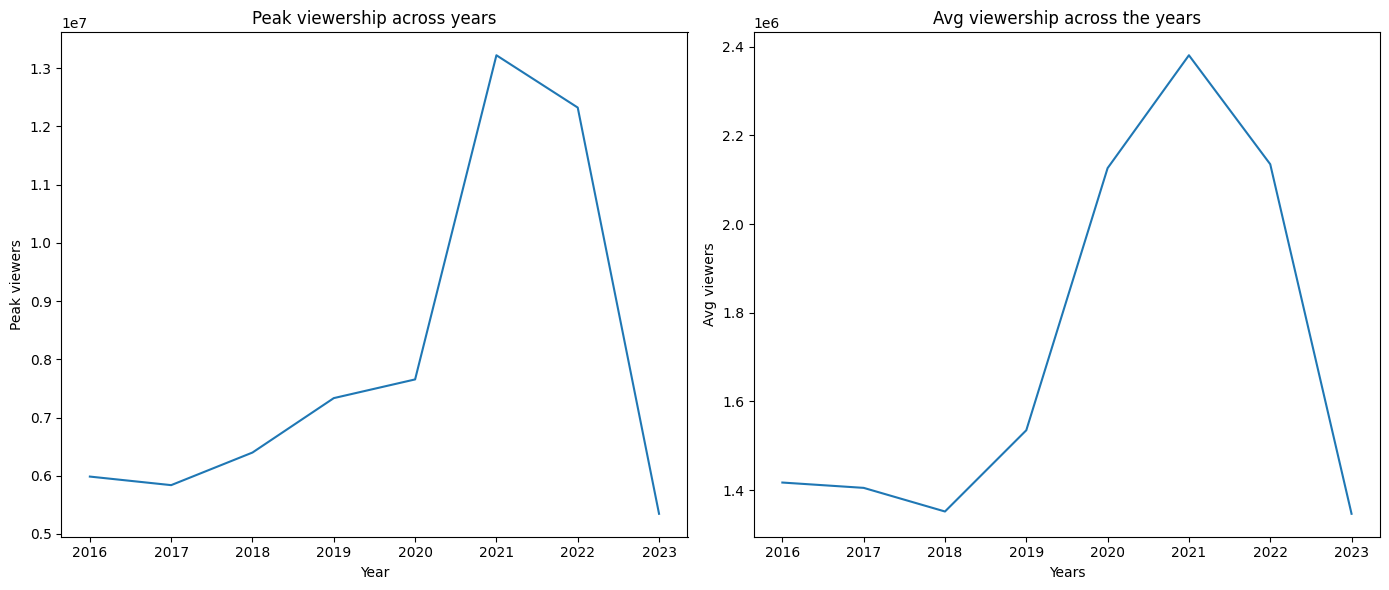

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

sns.lineplot(data=peak_views, x='Year', y='Peak_viewers', ax=axs[0])
axs[0].set_title('Peak viewership across years')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Peak viewers')

sns.lineplot(data=lol_avg_views, x='Year', y='Avg_viewers', ax=axs[1])
axs[1].set_title('Avg viewership across the years')
axs[1].set_xlabel('Years')
axs[1].set_ylabel('Avg viewers')

plt.tight_layout()
plt.show()

In [15]:
top10 = game_data_df.groupby(['Year','Game']).agg({'Hours_watched':'sum'}).sort_values(by='Hours_watched',ascending=False).head(10)
top10

Hours_watched
Year Game                             
2022 Just Chatting          3139111208
2021 Just Chatting          3020771657
2023 Just Chatting          2336790283
2020 Just Chatting          1995891029
2021 Grand Theft Auto V     1874989023
     League of Legends      1735661105
2022 League of Legends      1556699612
2020 League of Legends      1553536532
2022 Grand Theft Auto V     1414287042
2018 Fortnite               1358048914

In [16]:
avgHours_years = game_data_df.groupby('Year').agg({'Hours_watched':'mean'})
avgHours_years['Hours_watched'] = avgHours_years['Hours_watched'].map(lambda x: int(x))

In [17]:
total_avg = (avgHours_years.sum()/8).round()
print(total_avg)

Hours_watched    5645920.0
dtype: float64


In [18]:
avgChannels_years = game_data_df.groupby('Year').agg({'Avg_channels':'mean'})

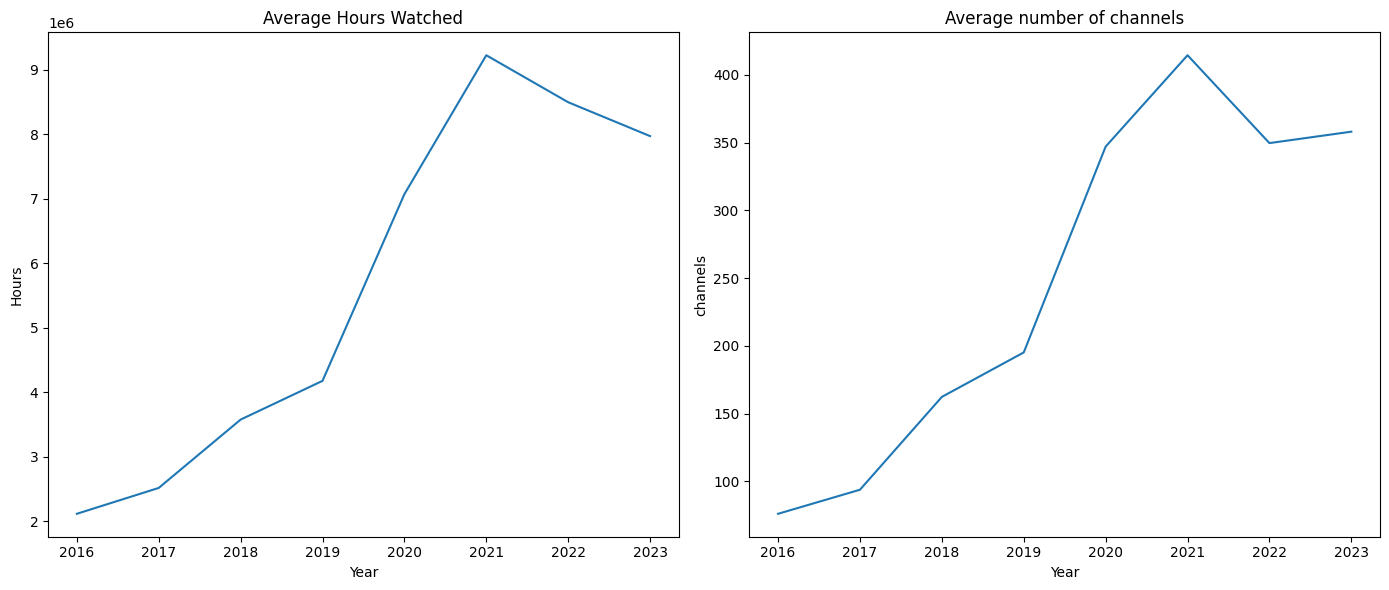

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))


sns.lineplot(data=avgHours_years, x='Year', y='Hours_watched', ax=axs[0])
axs[0].set_title('Average Hours Watched')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Hours')

# Plot 2: Hours_streamed
sns.lineplot(data=avgChannels_years, x='Year', y='Avg_channels', ax=axs[1])
axs[1].set_title('Average number of channels')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('channels')

# Adjust layout
plt.tight_layout()
plt.show()

In [20]:
#top 3 years with the most streams
global_data_df.groupby('year').agg({'Streams':'sum'}).nlargest(3,'Streams')

,Streams
year,
2022,284871753
2021,257692526
2020,220187428


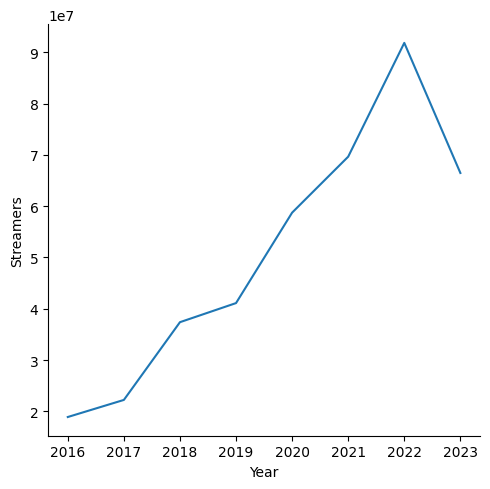

In [36]:
streamer_years = game_data_df.groupby('Year').agg({'Streamers':'sum'})
sns.relplot(data=streamer_years,x='Year',y='Streamers',kind='line')

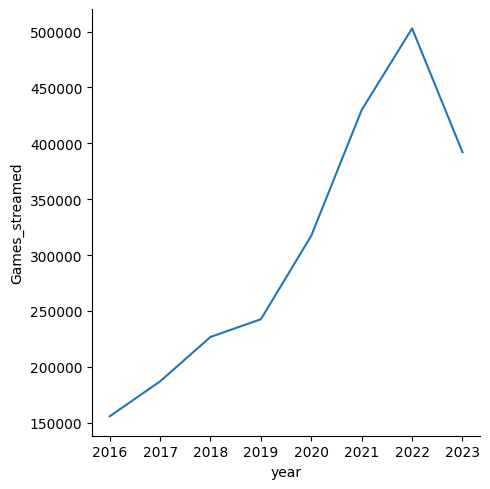

In [21]:
games_streamed = global_data_df.groupby('year').agg({'Games_streamed':'sum'})
sns.relplot(data=games_streamed,x='year',y='Games_streamed',kind='line')

In [22]:
features = game_data_df.drop(['Game'],axis=1)
features_corr = features.corr()

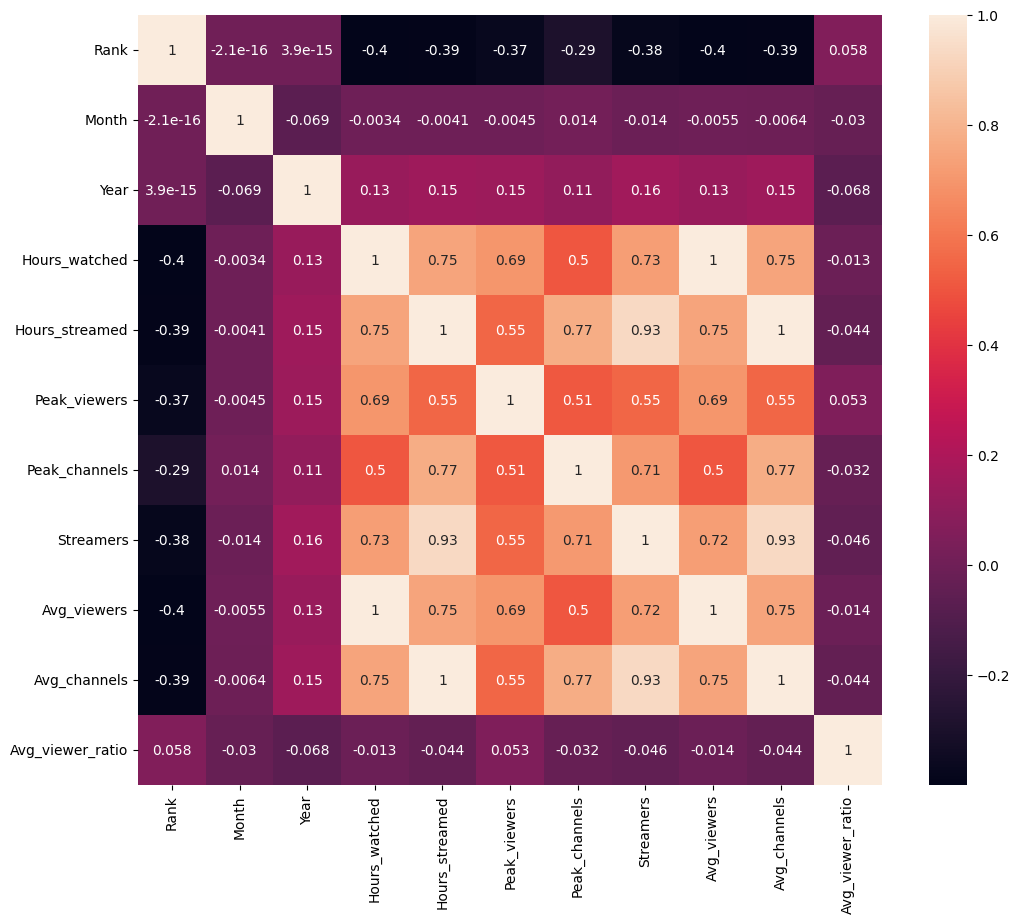

In [23]:
plt.figure(figsize=(12, 10))
sns.heatmap(data=features_corr,annot=True)
plt.show()

In [24]:
X = game_data_df[['Avg_channels','Hours_streamed','Avg_viewers','Streamers']]
y = game_data_df['Hours_watched']

In [25]:
print(X)

       Avg_channels  Hours_streamed  Avg_viewers  Streamers
0              1833         1362044       127021     129172
1              1117          830105        64378     120849
2               583          433397        60815      44074
3               317          235903        53749      36170
4              1549         1151578        21740     214054
...             ...             ...          ...        ...
18595            25           18617          778       4034
18596            23           16578          767       3926
18597            28           20142          752       5673
18598            37           27014          742       1144
18599            51           36741          737       6652

[18600 rows x 4 columns]


In [26]:
print(y)

0        94377226
1        47832863
2        45185893
3        39936159
4        16153057
           ...   
18595      560064
18596      551596
18597      540735
18598      533644
18599      530610
Name: Hours_watched, Length: 18600, dtype: int64


In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [28]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 
regressor.fit(X_train,y_train)

LinearRegression()

In [29]:
y_pred = regressor.predict(X_test)
y_pred = y_pred.astype(int).reshape((len(y_pred),1))

y_test = np.asarray(y_test).astype(int).reshape((len(y_test),1))


In [30]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")


Mean Absolute Error: 73591.29758064516


In [31]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 154760635544.25296


In [32]:
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")


Root Mean Squared Error: 393396.2830839317


In [33]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")


R-squared: 0.999568784243211


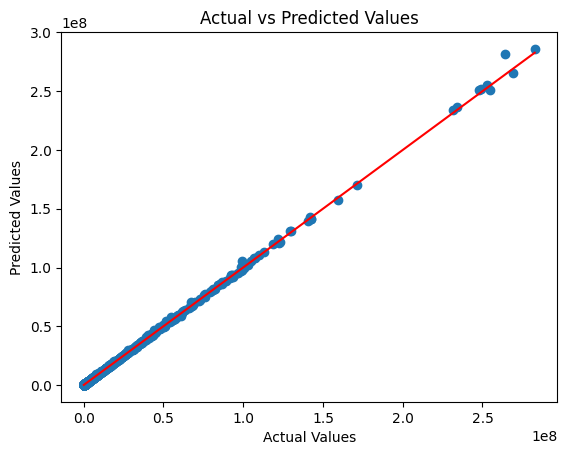

In [34]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line of perfect prediction
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()
